# Imporation des packages

In [7]:
# Import des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [8]:
# Charger la base de données Boston Housing
data = pd.read_csv('/kaggle/input/dataprepo/data.csv')
data
df3= data.copy()
df4= data.copy()

In [9]:
data['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [10]:
# Desciption de la base de données
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Identification graphique des outliers

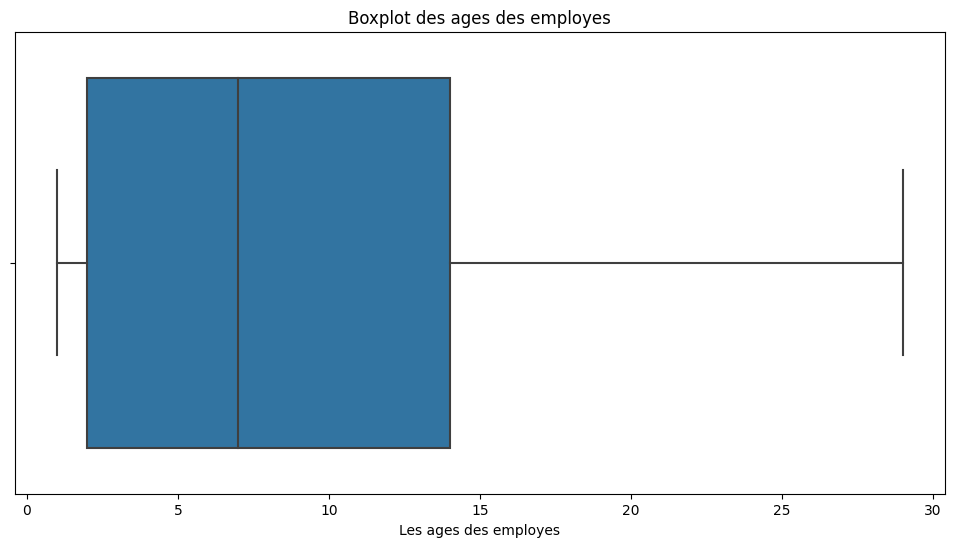

In [11]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='DistanceFromHome')
plt.xlabel('Les ages des employes')
plt.title("Boxplot des ages des employes")
plt.show()

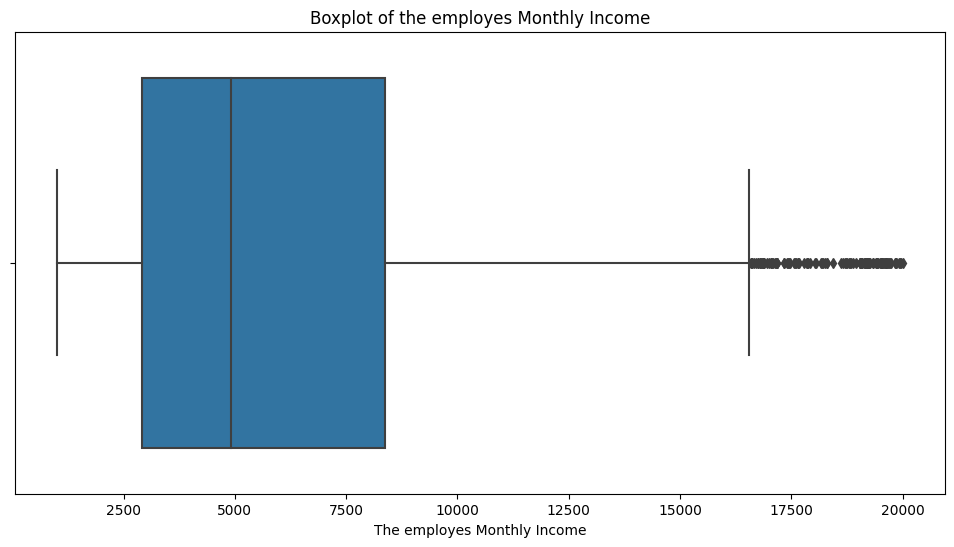

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='MonthlyIncome')
plt.xlabel('The employes Monthly Income')
plt.title("Boxplot of the employes Monthly Income")
plt.show()

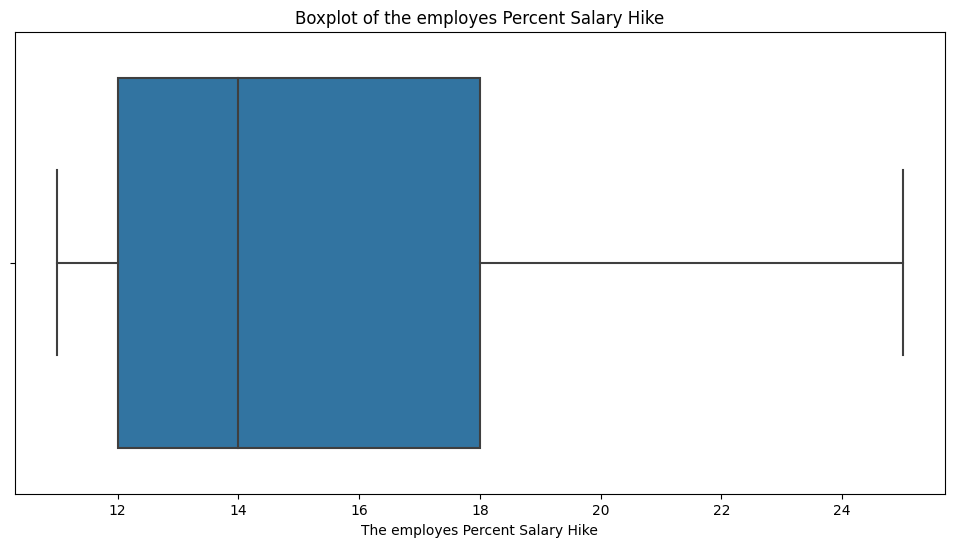

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='PercentSalaryHike')
plt.xlabel('The employes Percent Salary Hike')
plt.title("Boxplot of the employes Percent Salary Hike")
plt.show()

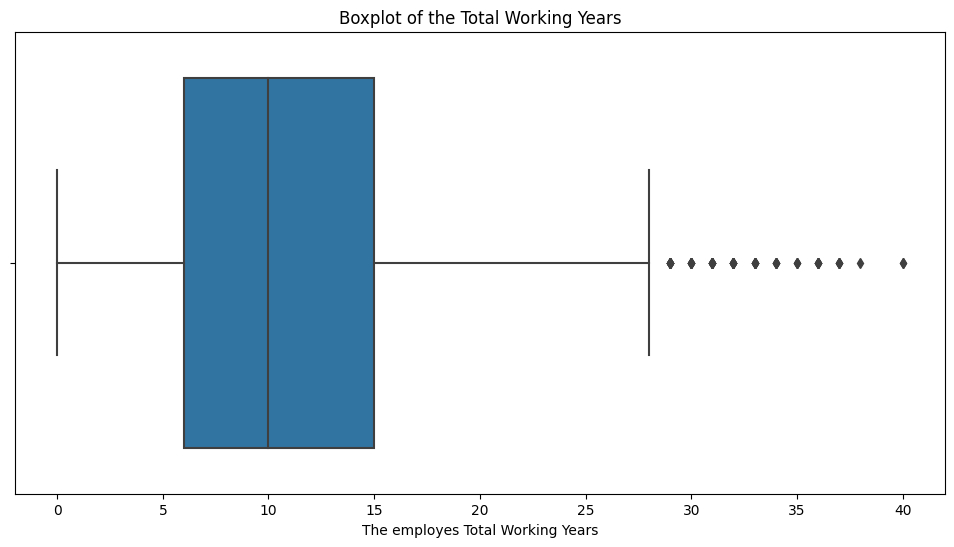

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='TotalWorkingYears')
plt.xlabel('The employes Total Working Years')
plt.title("Boxplot of the Total Working Years")
plt.show()

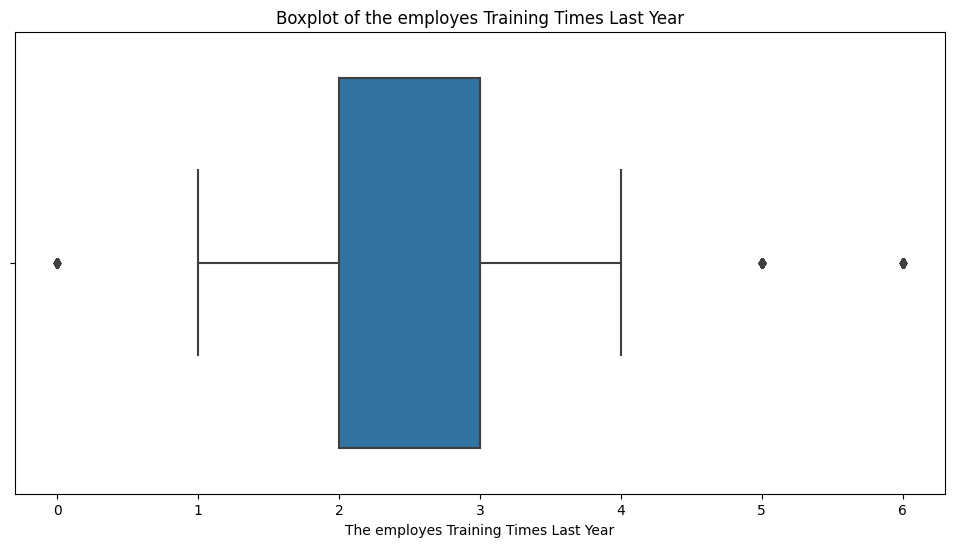

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='TrainingTimesLastYear')
plt.xlabel('The employes Training Times Last Year')
plt.title("Boxplot of the employes Training Times Last Year")
plt.show()

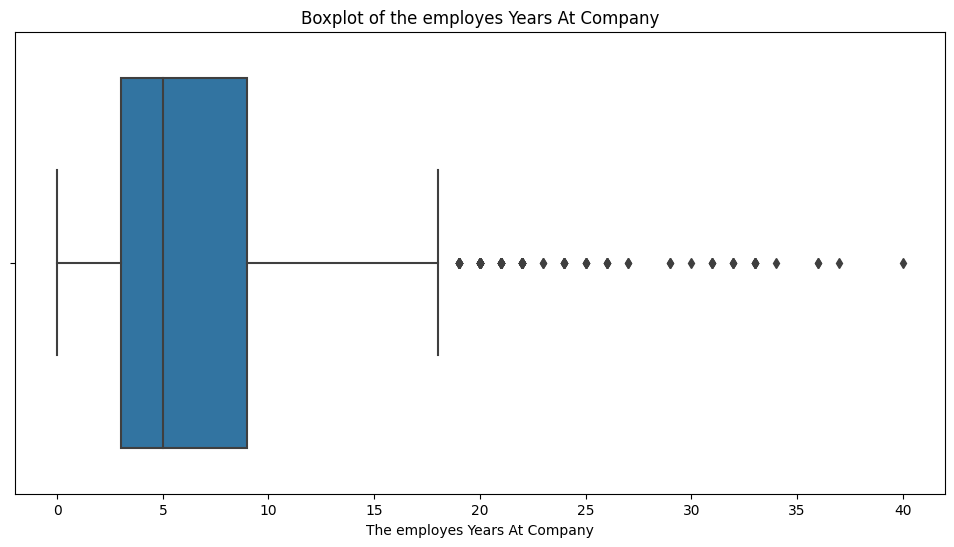

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='YearsAtCompany')
plt.xlabel('The employes Years At Company')
plt.title("Boxplot of the employes Years At Company")
plt.show()

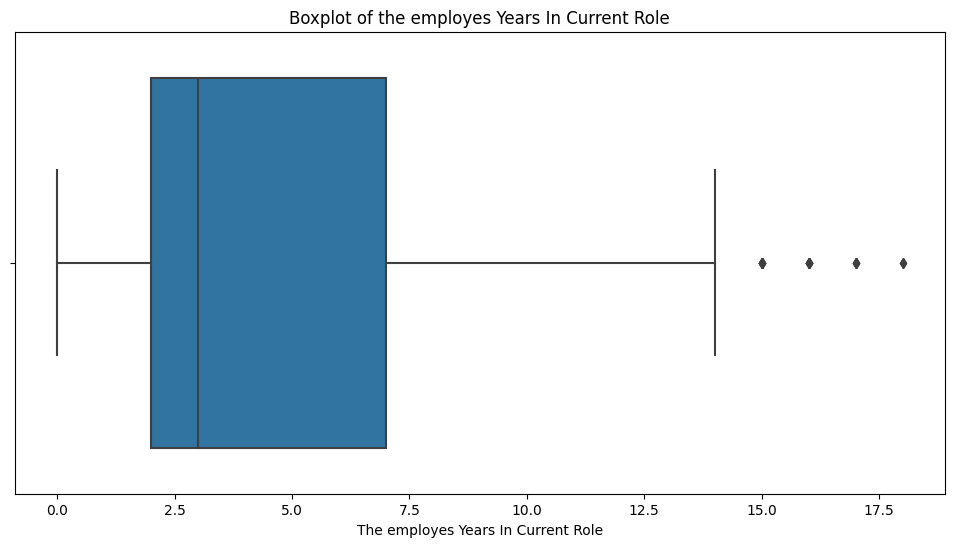

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='YearsInCurrentRole')
plt.xlabel('The employes Years In Current Role')
plt.title("Boxplot of the employes Years In Current Role")
plt.show()

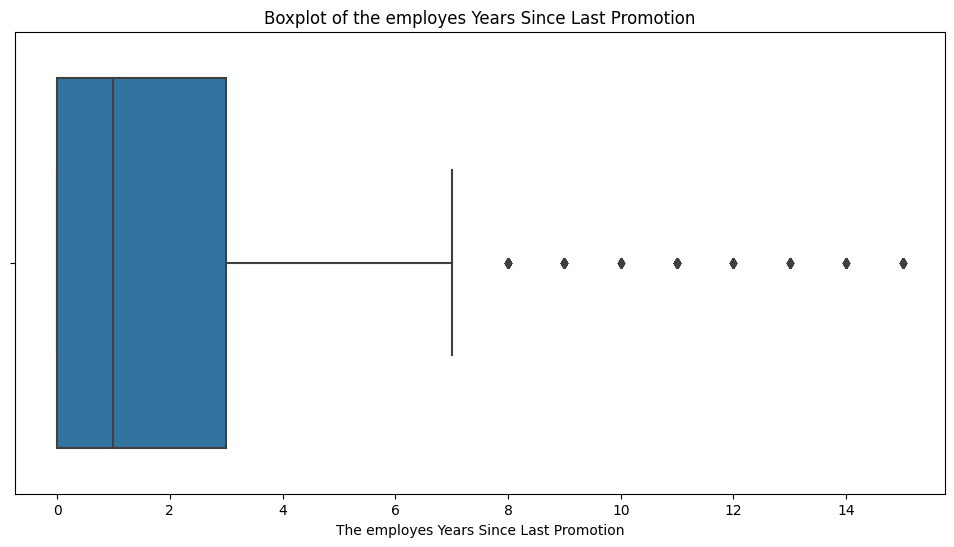

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='YearsSinceLastPromotion')
plt.xlabel('The employes Years Since Last Promotion')
plt.title("Boxplot of the employes Years Since Last Promotion")
plt.show()

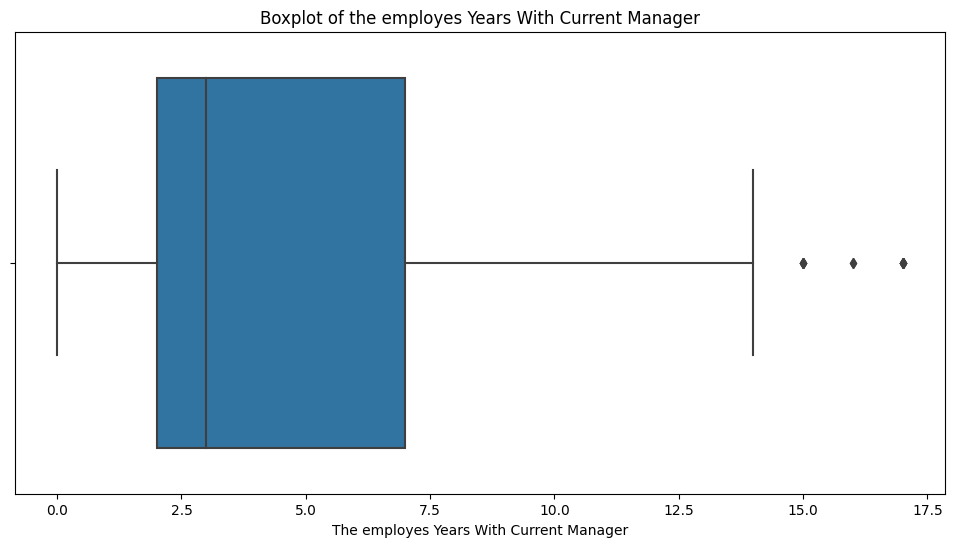

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='YearsWithCurrManager')
plt.xlabel('The employes Years With Current Manager')
plt.title("Boxplot of the employes Years With Current Manager")
plt.show()

# Identification des outliers univariées

## Identification des outliers IQR

La méthode de l'IQR est une approche courante pour identifier les valeurs aberrantes dans des données univariées. Elle utilise l'écart interquartile pour définir une plage de valeurs plausibles et identifie les observations qui sont en dehors de cette plage.

### Définition

L'IQR est défini comme la différence entre le troisième quartile (Q3) et le premier quartile (Q1) de la distribution des données. Les bornes inférieure et supérieure de la plage plausible sont définies comme suit :

- Limite inférieure : Q1 - 1,5 x IQR
- Limite supérieure : Q3 + 1,5 x IQR

Les observations en dehors de ces bornes sont considérées comme des valeurs aberrantes.

### Avantages

La méthode de l'IQR est relativement simple à comprendre et à implémenter. Elle est également assez robuste aux valeurs aberrantes, car elle utilise la médiane et l'écart interquartile pour calculer les bornes plausibles.

### Inconvénients

La méthode de l'IQR peut ne pas fonctionner correctement dans certaines distributions non symétriques, car elle suppose une distribution normale ou presque normale des données. Elle peut également ne pas fonctionner correctement si les données contiennent de nombreux points de données aberrants.


In [20]:
# Identification des données aberrantes - IQR
# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]



In [21]:
# Trouver les outliers pour la colonne 'PRICE'
outliers = detect_outliers_iqr(data, 'YearsInCurrentRole')

# Afficher les outliers
print("Outliers détectés:")
print(outliers)

Outliers détectés:
      Age Attrition     BusinessTravel  DailyRate              Department  \
45     41       Yes      Travel_Rarely       1360  Research & Development   
63     59        No      Travel_Rarely       1435                   Sales   
123    51        No      Travel_Rarely        684  Research & Development   
187    55        No      Travel_Rarely        692  Research & Development   
190    52        No      Travel_Rarely        699  Research & Development   
231    42        No      Travel_Rarely        532  Research & Development   
281    42        No      Travel_Rarely        635                   Sales   
417    40        No      Travel_Rarely       1398                   Sales   
466    41        No      Travel_Rarely       1276                   Sales   
595    58       Yes      Travel_Rarely        286  Research & Development   
716    41        No  Travel_Frequently        840  Research & Development   
746    41        No         Non-Travel        247  Resear

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
features=['MonthlyIncome','TrainingTimesLastYear','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [24]:
##Une copie de data
df= data

In [25]:
##Traiter les outliers par imputations avec les valeurs limites
def impute_outliers(df, features):
    Q1 = np.percentile(df[features], 25)
    Q3 = np.percentile(df[features], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[features]< lower_bound, features]= lower_bound
    df.loc[df[features]> upper_bound, features]= upper_bound

In [26]:
for feat in features:
    impute_outliers(df, feat)

/tmp/ipykernel_33/864903348.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[features]< lower_bound, features]= lower_bound
/tmp/ipykernel_33/864903348.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[features]< lower_bound, features]= lower_bound
/tmp/ipykernel_33/864903348.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[features]< lower_bound, features]= lower_bound
/tmp/ipykernel_33/864903348.py:8: FutureWarning: Setting

In [27]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6361.891837
std       4353.345470
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      16581.000000
Name: MonthlyIncome, dtype: float64

In [28]:
data['MonthlyIncome'].describe()

count     1470.000000
mean      6361.891837
std       4353.345470
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      16581.000000
Name: MonthlyIncome, dtype: float64

In [29]:
## Creation d'un subset
def subset_outliers(df, features):
    Q1 = np.percentile(df[features], 25)
    Q3 = np.percentile(df[features], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[features]< lower_bound) | (df[features]> upper_bound)]

In [30]:
df3

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [31]:
def outliers(data):
    plt.figure(figsize=(16,6))
    sns.boxplot(data= data)
    plt.grid()

In [32]:
for feat in features:
    subdata=subset_outliers(df3,feat)

In [33]:
subdata[features]

,MonthlyIncome,TrainingTimesLastYear,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,10248,4,24,22,6,5,17
123,19537,5,23,20,18,15,15
153,2348,2,20,17,9,0,15
187,18722,3,36,24,15,2,15
231,19232,3,22,22,17,11,15
386,3034,2,18,18,7,12,17
561,16856,3,34,34,6,1,16
616,16307,2,29,20,6,4,17
635,10685,2,17,17,14,5,15
686,4721,3,20,18,13,2,17


In [34]:
#On les supprimes
def drop_outliers(data, features):
    Q1 = np.percentile(df[features], 25)
    Q3 = np.percentile(df[features], 75)
    limit= 1.5*(Q3-Q1)
    data.drop(data[data[features]> limit+ Q3].index, inplace=True)
    data.drop(data[data[features]< Q1- limit].index, inplace=True)

In [35]:
for feat in features:
    drop_outliers(df4,features)

In [36]:
df3['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [37]:
data['MonthlyIncome'].describe()

count     1470.000000
mean      6361.891837
std       4353.345470
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      16581.000000
Name: MonthlyIncome, dtype: float64

# # # Remarque apres traitement des outliers

On remarqu'il nya pas une grande variete entre les indicateurs statisques des donnees( initiales et celles traiter)

# Analyse des liaison entre deux variables quantitatives

In [38]:
dataClean= df3.copy()

# # analyse graphique

In [39]:

# sns.pairplot(dataClean[features] ,kind="scatter")

In [40]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


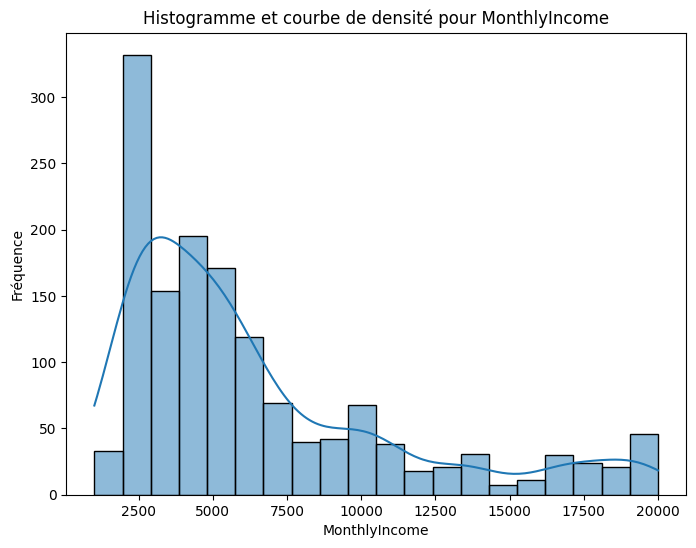

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


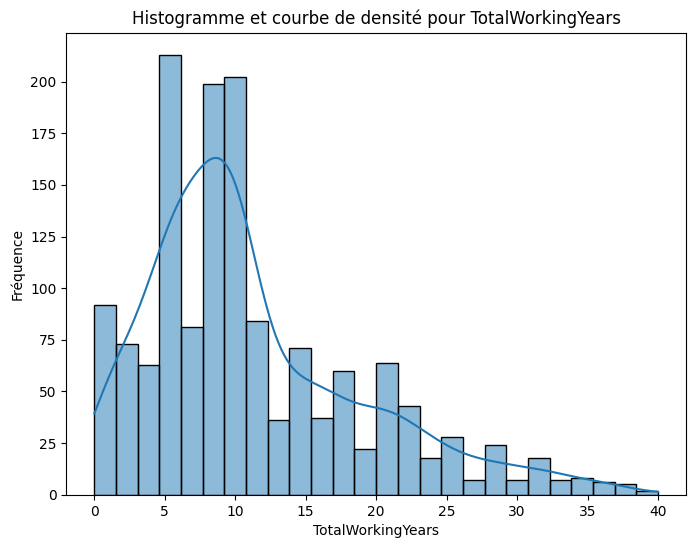

P-valeur de la normalité (Shapiro-Wilk) pour MonthlyIncome: 4.4031748323132235e-37
P-valeur de la normalité (Shapiro-Wilk) pour TotalWorkingYears: 5.625933266312312e-29


In [41]:
# Analyse de la normalité grâce au test de shapiro
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
# Variables quantitatives d'intérêt
var1 = 'MonthlyIncome'
var2 = 'TotalWorkingYears'

# Analyse graphique de la normalité des deux variables
for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataClean[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()

# Vérifier la normalité à l'aide du test de Shapiro-Wilk
for var in [var1, var2]:
    _, p_value = shapiro(dataClean[var])
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)



In [42]:
def graphBivarie(data,var1,var2):
    # Analyse graphique de la normalité des deux variables
    for var in [var1, var2]:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[var], kde=True)
        plt.xlabel(var)
        plt.ylabel('Fréquence')
        plt.title(f"Histogramme et courbe de densité pour {var}")
        plt.show()

    # Vérifier la normalité à l'aide du test de Shapiro-Wilk
    for var in [var1, var2]:
        _, p_value = shapiro(dataClean[var])
        print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


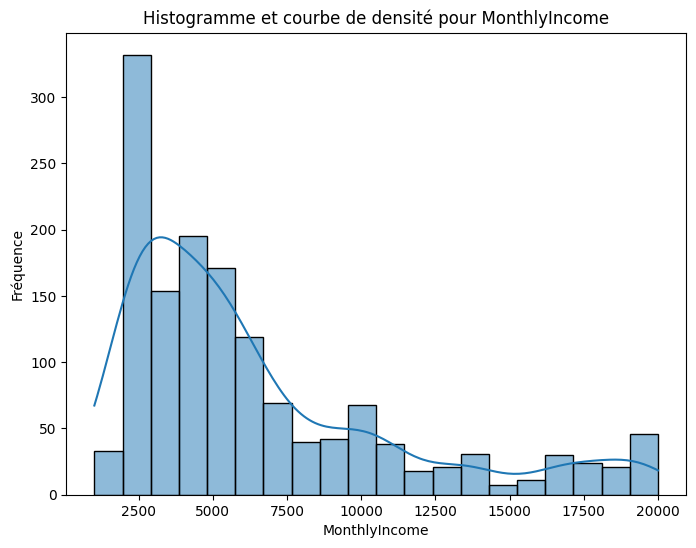

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


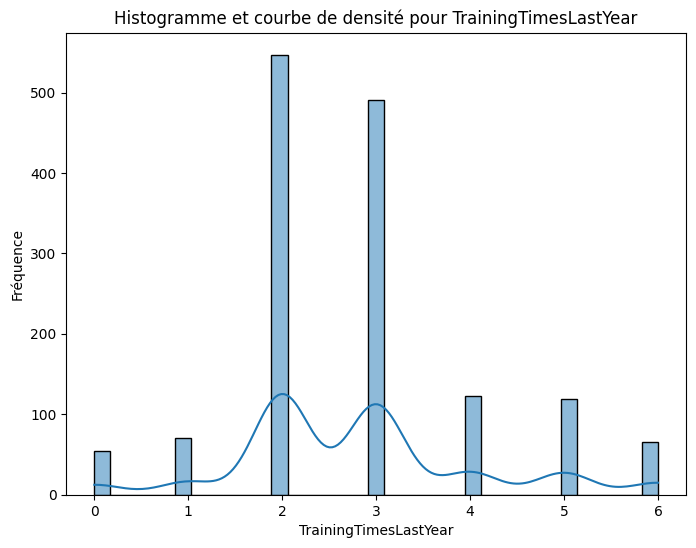

P-valeur de la normalité (Shapiro-Wilk) pour MonthlyIncome: 4.4031748323132235e-37
P-valeur de la normalité (Shapiro-Wilk) pour TrainingTimesLastYear: 1.5869260252485102e-30


In [43]:
var1="MonthlyIncome"
var2= "TrainingTimesLastYear"
graphBivarie(dataClean,var1,var2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


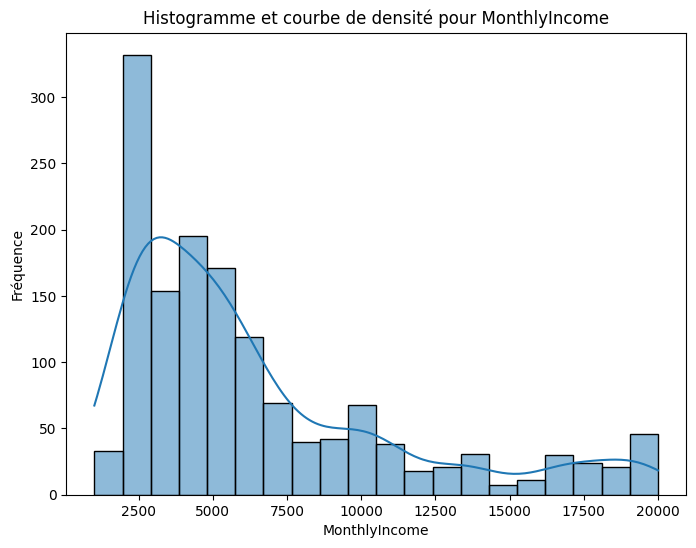

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


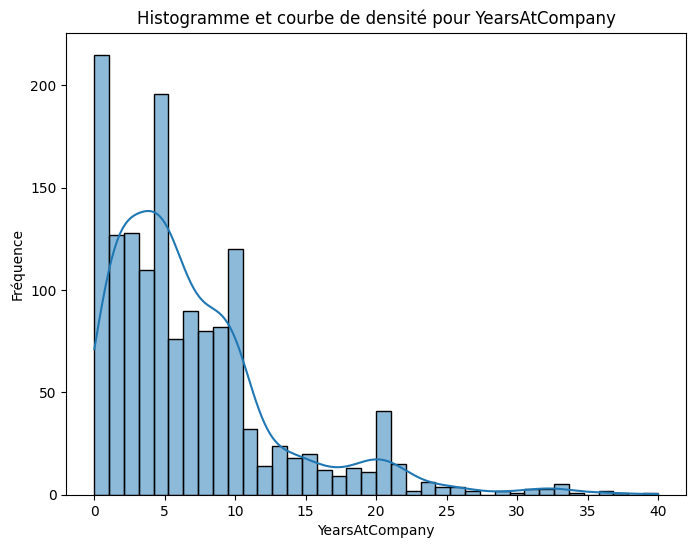

P-valeur de la normalité (Shapiro-Wilk) pour MonthlyIncome: 4.4031748323132235e-37
P-valeur de la normalité (Shapiro-Wilk) pour YearsAtCompany: 3.6694282308284376e-36


In [44]:
var1="MonthlyIncome"
var2= "YearsAtCompany"
graphBivarie(dataClean,var1,var2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


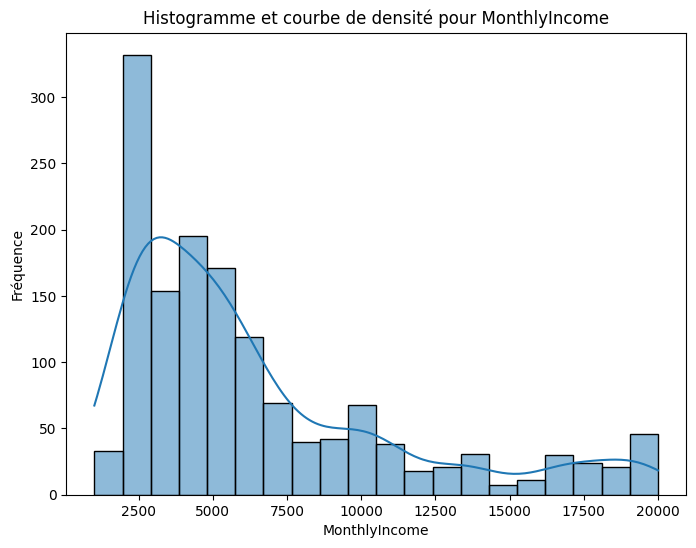

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


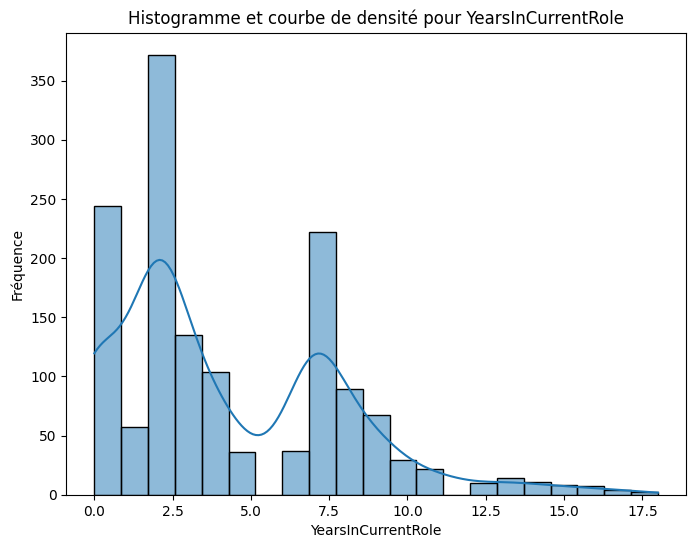

P-valeur de la normalité (Shapiro-Wilk) pour MonthlyIncome: 4.4031748323132235e-37
P-valeur de la normalité (Shapiro-Wilk) pour YearsInCurrentRole: 2.140164071943242e-30


In [45]:
var1="MonthlyIncome"
var2= "YearsInCurrentRole"
graphBivarie(dataClean,var1,var2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


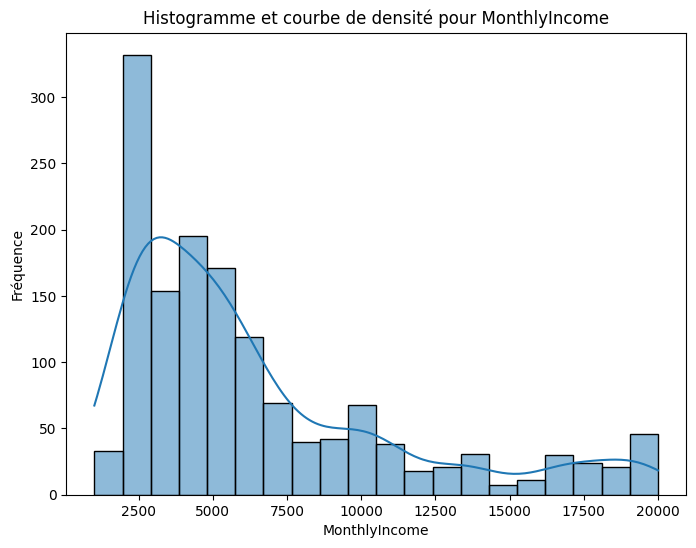

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


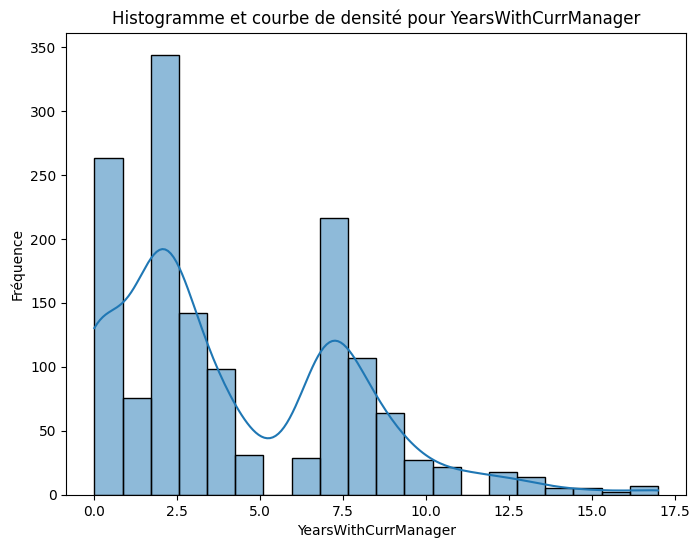

P-valeur de la normalité (Shapiro-Wilk) pour MonthlyIncome: 4.4031748323132235e-37
P-valeur de la normalité (Shapiro-Wilk) pour YearsWithCurrManager: 3.051644272361805e-30


In [46]:
var1="MonthlyIncome"
var2= "YearsWithCurrManager"
graphBivarie(dataClean,var1,var2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


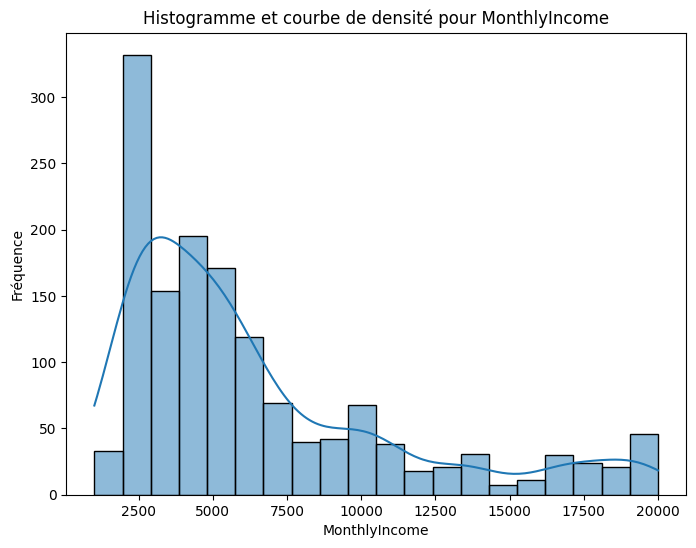

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


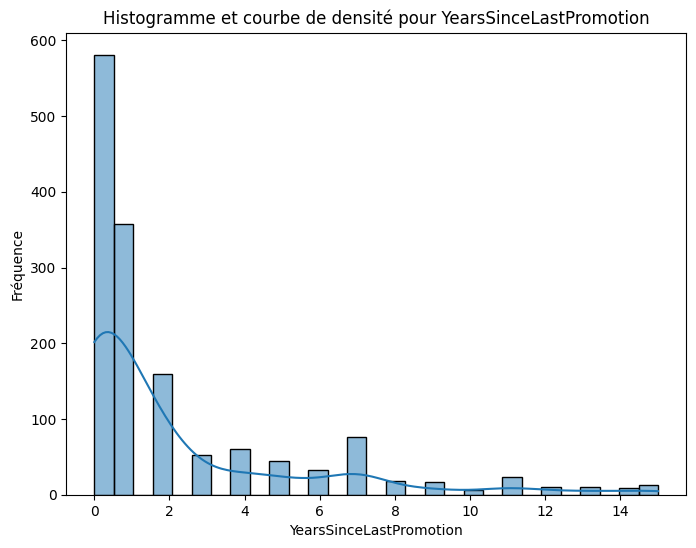

P-valeur de la normalité (Shapiro-Wilk) pour MonthlyIncome: 4.4031748323132235e-37
P-valeur de la normalité (Shapiro-Wilk) pour YearsSinceLastPromotion: 4.203895392974451e-45


In [47]:
var1="MonthlyIncome"
var2= "YearsSinceLastPromotion"
graphBivarie(dataClean,var1,var2)

In [48]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

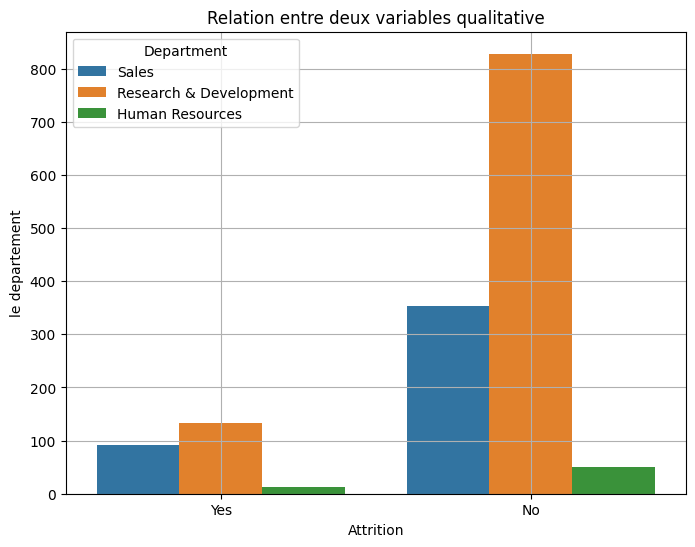

In [49]:
#Analyse graphique entre sex et class de titanic 
# Créer un graphique de la relation entre 'sex' et 'class' dans Titanic
plt.figure(figsize=(8, 6))
sns.countplot(data=dataClean, x='Attrition', hue='Department')
plt.xlabel('Attrition')
plt.ylabel('le departement')
plt.title('Relation entre deux variables qualitative')
plt.grid()
plt.show()

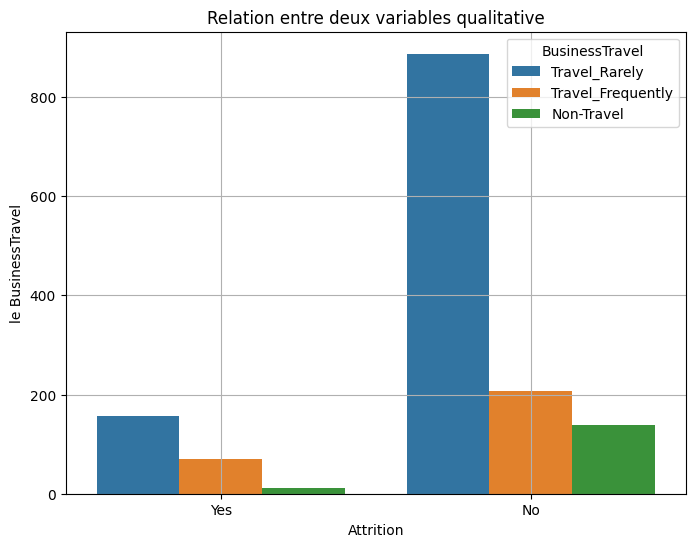

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataClean, x='Attrition', hue='BusinessTravel')
plt.xlabel('Attrition')
plt.ylabel('le BusinessTravel')
plt.title('Relation entre deux variables qualitative')
plt.grid()
plt.show()

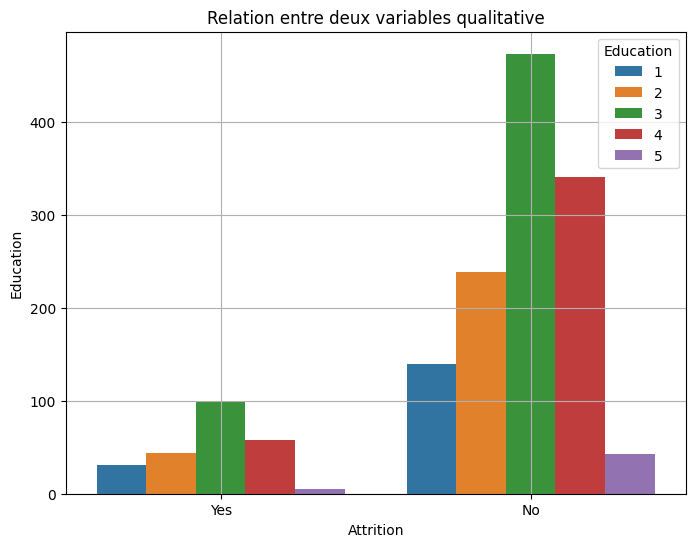

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataClean, x='Attrition', hue='Education')
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.title('Relation entre deux variables qualitative')
plt.grid()
plt.show()

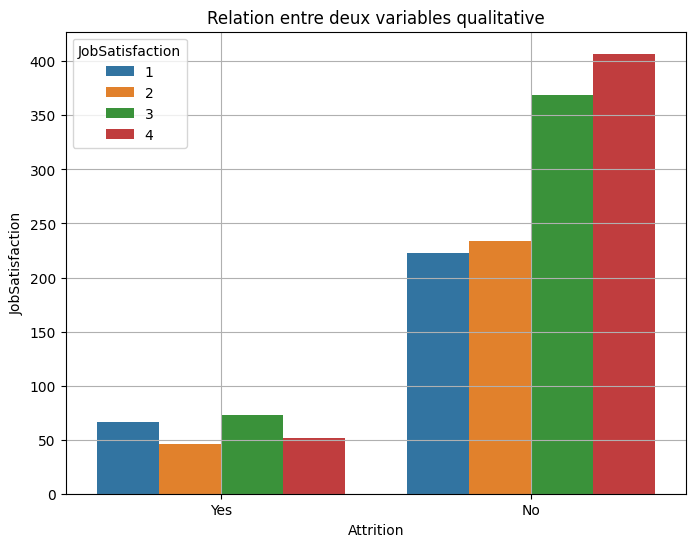

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataClean, x='Attrition', hue='JobSatisfaction')
plt.xlabel('Attrition')
plt.ylabel('JobSatisfaction')
plt.title('Relation entre deux variables qualitative')
plt.grid()
plt.show()

# Faisons le Test de Chi2 pour voir s'il existe une realtion entre les variables qualitatives

In [53]:
from scipy.stats import chi2_contingency
# Créer un tableau de contingence
contingency_table = pd.crosstab(dataClean['Attrition'], dataClean['JobSatisfaction'])
contingency_table

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


In [54]:

# Effectuer le test du chi-carré
chi2_stat, p_value, ddl, expected_freq = chi2_contingency(contingency_table)

# Afficher les résultats
print("Statistique du Chi2 :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", ddl)
print("Fréquences attendues the :\n", expected_freq)

Statistique du Chi2 : 17.505077010348
P-valeur : 0.0005563004510387556
Degrés de liberté : 3
Fréquences attendues the :
 [[242.40612245 234.85714286 370.73877551 384.99795918]
 [ 46.59387755  45.14285714  71.26122449  74.00204082]]


In [55]:
contingency_table1 = pd.crosstab(dataClean['Attrition'], dataClean['Department'])
contingency_table1

chi2_stat, p_value, ddl, expected_freq = chi2_contingency(contingency_table1)

# Afficher les résultats
print("Statistique du Chi2 :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", ddl)
print("Fréquences attendues the :\n", expected_freq)

Statistique du Chi2 : 10.79600732241067
P-valeur : 0.004525606574479633
Degrés de liberté : 2
Fréquences attendues the :
 [[ 52.84285714 806.06326531 374.09387755]
 [ 10.15714286 154.93673469  71.90612245]]


In [56]:
contingency_table1

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [57]:
def testChi2(data,var1,var2):
    test= False
    contingency_table1 = pd.crosstab(data[var1], data[var2])
    print(contingency_table1)

    chi2_stat, p_value, ddl, expected_freq = chi2_contingency(contingency_table1)
    if p_value<0.05:
        test=True
        print("+++++++++++++++++++Right!!!! Il ya une association entre les deux variables+++++++++++++++++++++++++")
    else: 
        test= False
        print("--------------Pas d'association possible entre les variables------------------------")
    # Afficher les résultats
    print("Statistique du Chi2 :", chi2_stat)
    print("P-valeur :", p_value)
    print("Degrés de liberté :", ddl)
    print("Fréquences attendues theorique :\n", expected_freq)

In [58]:
vars_qualitatives=["BusinessTravel","DailyRate","Education","EducationField","EnvironmentSatisfaction","MonthlyRate","WorkLifeBalance"]

In [59]:
for var in vars_qualitatives:
    testChi2(dataClean,'Attrition',var)
    print('\n\n')

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156
+++++++++++++++++++Right!!!! Il ya une association entre les deux variables+++++++++++++++++++++++++
Statistique du Chi2 : 24.182413685655174
P-valeur : 5.608614476449931e-06
Degrés de liberté : 2
Fréquences attendues theorique :
 [[125.81632653 232.34081633 874.84285714]
 [ 24.18367347  44.65918367 168.15714286]]



DailyRate  102   103   104   105   106   107   109   111   115   116   ...  \
Attrition                                                              ...   
No            1     0     0     1     1     1     0     3     0     2  ...   
Yes           0     1     1     0     0     0     1     0     1     0  ...   

DailyRate  1480  1482  1485  1488  1490  1492  1495  1496  1498  1499  
Attrition                                           

### La lsite des features ayant une association avec notre target

In [60]:
features_asso=['WorkLifeBalance','EnvironmentSatisfaction','EducationField','BusinessTravel','Gender','RelationshipSatisfaction']

### Calculer l'intensite des relation avec le V de Cramer ou le coef de Tschuprow 

In [61]:
#Le Cramer-V
# Calculer le coefficient de Cramér-V
def CramerV(data,var1,var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    n = contingency_table.sum().sum() #Nombre total d'individu dans la table c'est pourqoi on somme 2fs
    min_dim = min(contingency_table.shape) - 1
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))
    # Afficher le coefficient de Cramér-V
    print("Coefficient de Cramér-V :", cramer_v)

In [62]:
for var in features_asso :
    CramerV(dataClean,'Attrition',var)

Coefficient de Cramér-V : 0.10538267516821954
Coefficient de Cramér-V : 0.12372858554725893
Coefficient de Cramér-V : 0.10440851908182987
Coefficient de Cramér-V : 0.12825997643406717
Coefficient de Cramér-V : 0.027565224125453088
Coefficient de Cramér-V : 0.05971057096963258


#### Interpretaion de V de Cramer

Interprétation
Plus la valeur de Cramér-V est proche de 1 (supérieur à 0.60), plus l'association entre les deux variables est forte.
Donc toutes les variables ont une relations moins fortes avec le variable target

## Analyse entre une variable qualitative(target=Attrition) et les variables quantitative

##### Analyse graphique

In [63]:
#On les supprimes
def drop_outliers(data, features):
    Q1 = np.percentile(df[features], 25)
    Q3 = np.percentile(df[features], 75)
    limit= 1.5*(Q3-Q1)
    data.drop(data[data[features]> limit+ Q3].index, inplace=True)
    data.drop(data[data[features]< Q1- limit].index, inplace=True)

In [64]:
def anBox(data,var1,var2):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=var1, y=var2)
    plt.xlabel(f'La variables {var1}')
    plt.ylabel(f'La variable {var2}')
    plt.title('Relation entre les deux variables')
    plt.show()

In [65]:
features_quanti=['NumCompaniesWorked','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','HourlyRate','TrainingTimesLastYear','TotalWorkingYears','MonthlyIncome']

In [69]:
for feat in features_quanti :
    drop_outliers(dataClean,feat)

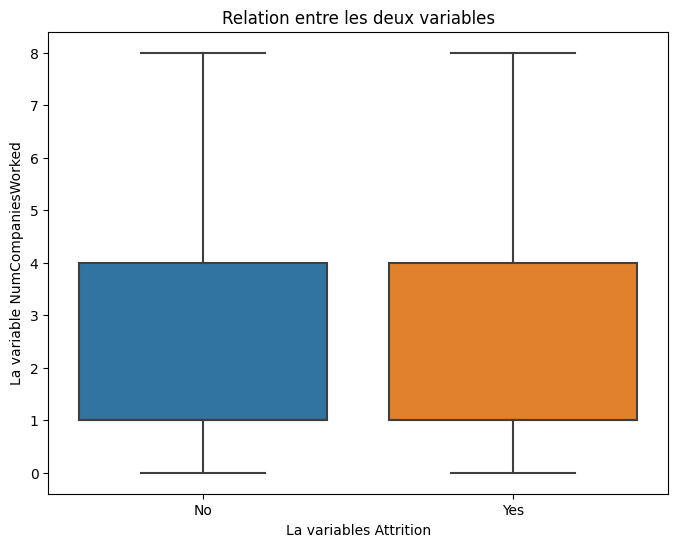

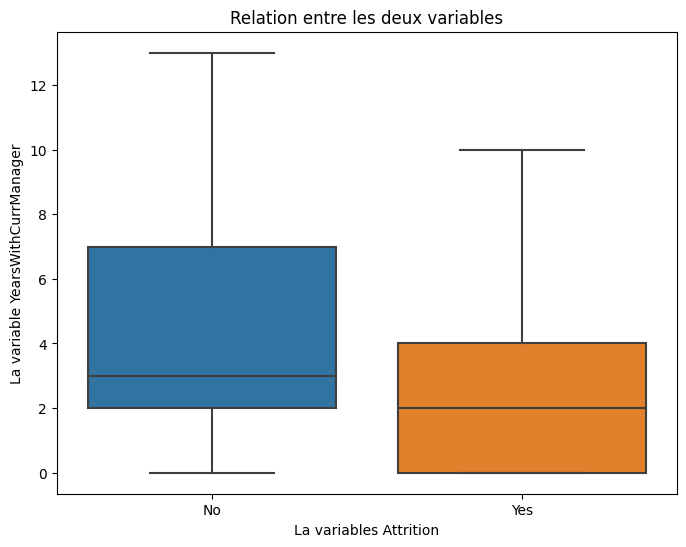

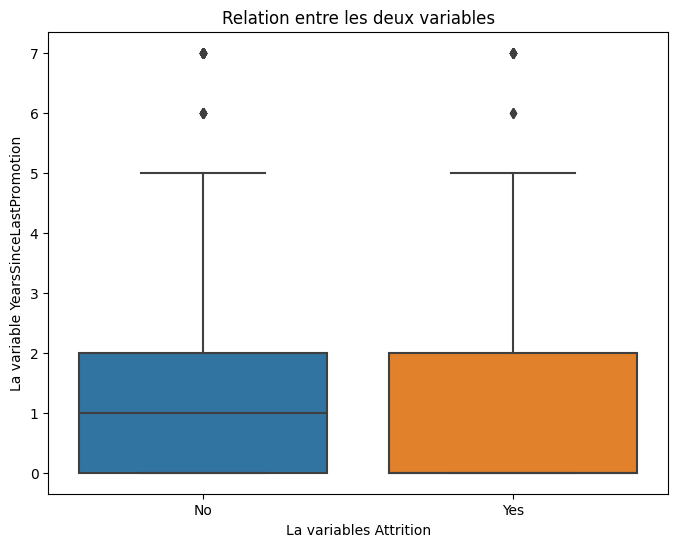

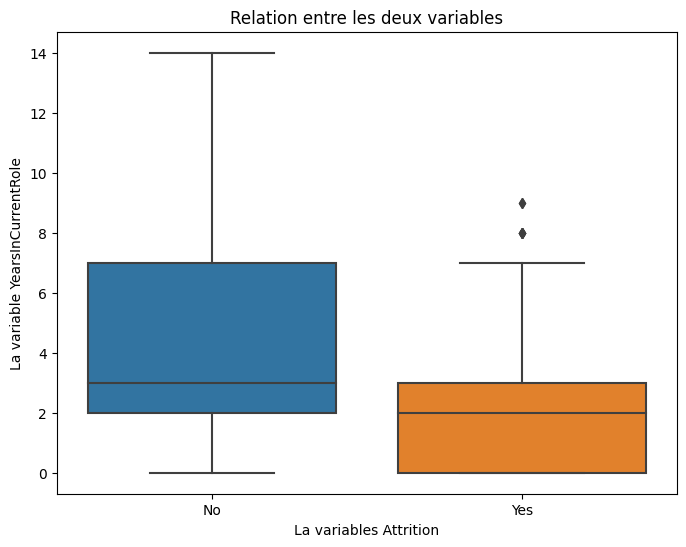

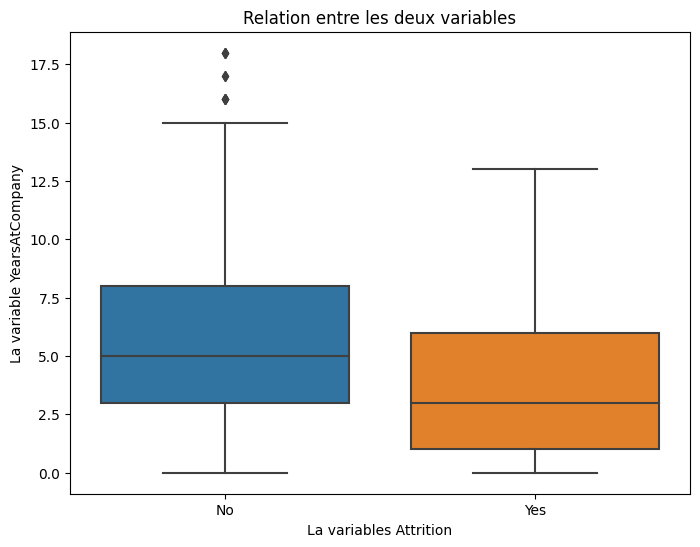

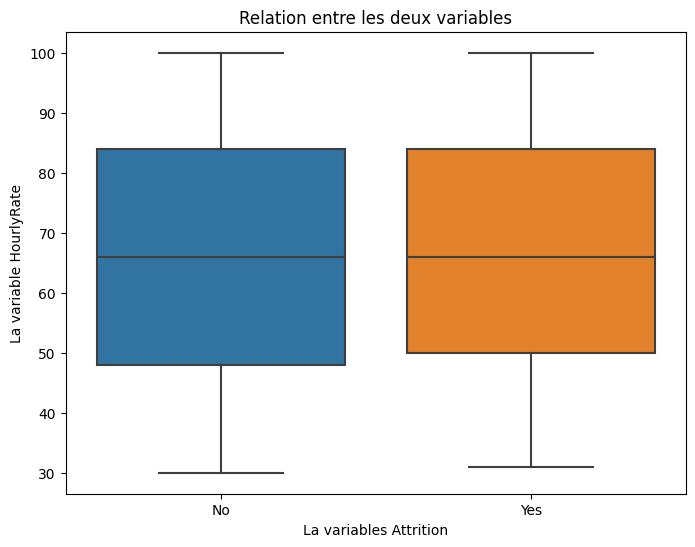

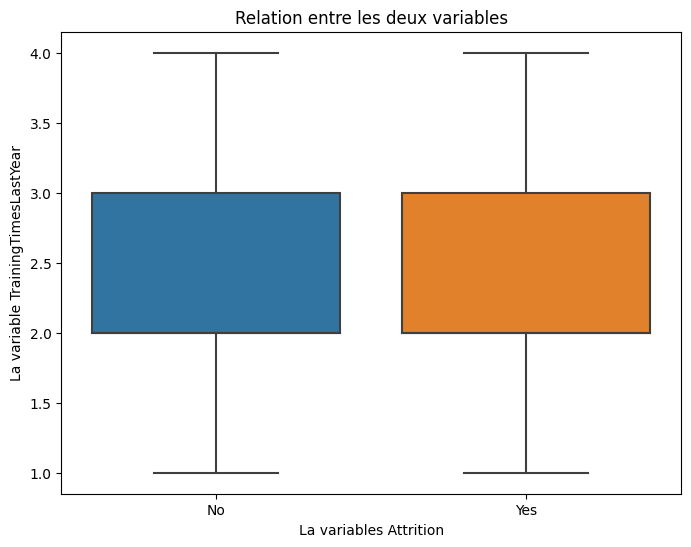

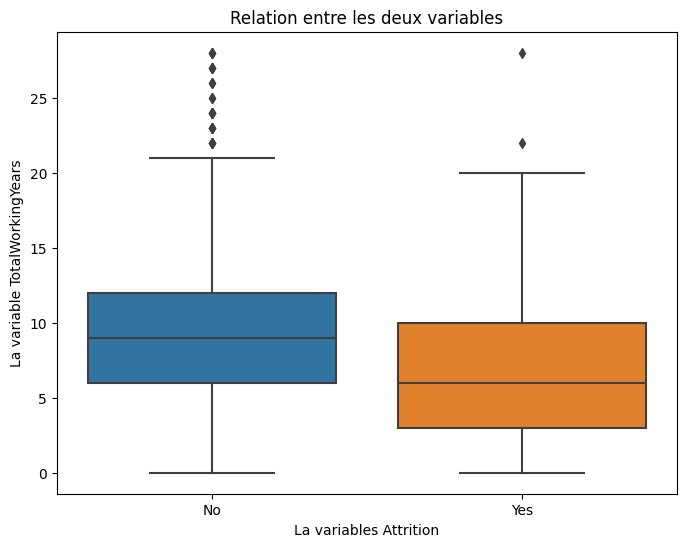

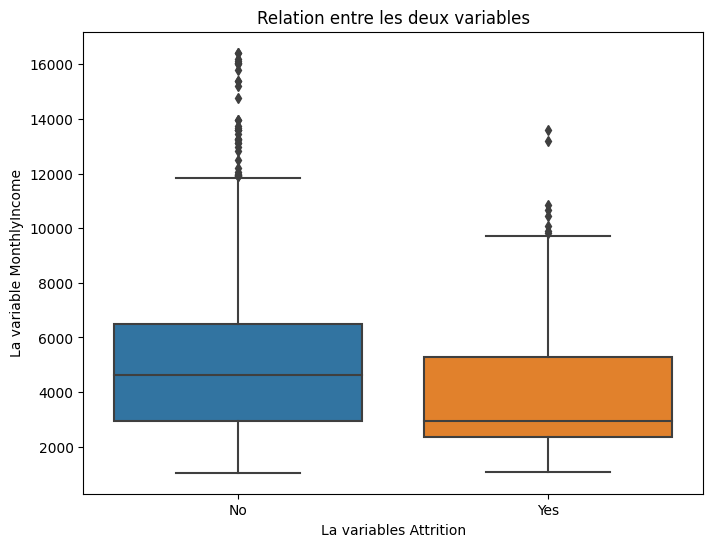

In [67]:
for vart in features_quanti:
    anBox(dataClean,'Attrition',vart)
    

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

# Test de Student (t-test)

### Hypothèses
* H0 (hypothèse nulle): Les moyennes des deux groupes sont égales.
* H1 (hypothèse alternative): Les moyennes des deux groupes sont différentes.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les moyennes des deux groupes sont significativement différentes.

In [72]:
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, wilcoxon

# Séparer les données en deux groupes pour le test de Student et le test de Mann-Whitney
attrition_yes = dataClean[dataClean['Attrition'] == 'Yes']
attrition_no = dataClean[dataClean['Attrition'] == 'No']

In [74]:
attrition_no

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [82]:
def TestStudent(data,var1,var2):
    attrition_yes = data[data[var1] == 'Yes'][var2]
    attrition_no = data[data[var1] == 'No'][var2]
    

    # Vérifier la normalité à l'aide du test de Shapiro-Wilk
    yes_p_value = shapiro(attrition_yes)
    no_p_value = shapiro(attrition_no)
     

    print("P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes:", yes_p_value)
    print("P-valeur de la normalité (Shapiro-Wilk) - Attrition_no:",no_p_value)
    

    # Histogrammes pour vérifier visuellement la normalité
    plt.figure(figsize=(12, 6))
    plt.subplot(131)
    plt.hist(attrition_yes, bins=10, color='blue', alpha=0.7)
    plt.title(f"{var1} ----{var2}")
    plt.subplot(132)
    plt.hist(attrition_no, bins=10, color='green', alpha=0.7)
    plt.title(f"{var1}---{var2}")
    
    plt.show()

    # Boîtes à moustaches pour vérifier visuellement la normalité
    plt.figure(figsize=(12, 6))
    plt.boxplot([attrition_yes, attrition_no], labels=[f'{var1}', f'{var2}'])
    plt.title("Boxplots - Attrition")
    plt.show()


P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes: ShapiroResult(statistic=0.8287050724029541, pvalue=5.618971542394047e-13)
P-valeur de la normalité (Shapiro-Wilk) - Attrition_no: ShapiroResult(statistic=0.8565374612808228, pvalue=1.5642846742572316e-26)


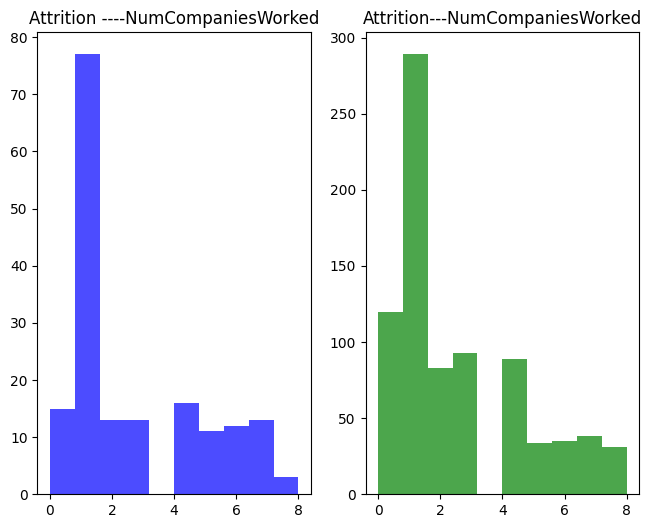

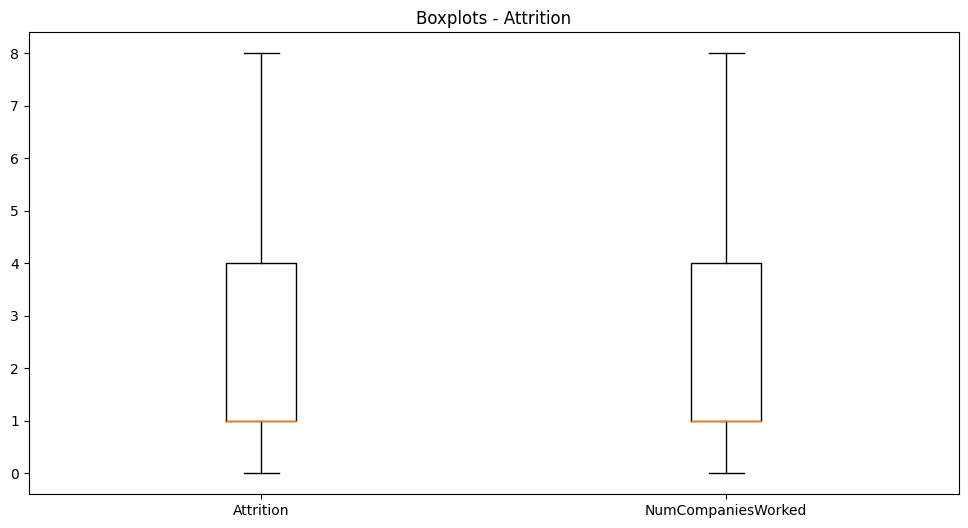


P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes: ShapiroResult(statistic=0.8195492625236511, pvalue=2.3561014250716994e-13)
P-valeur de la normalité (Shapiro-Wilk) - Attrition_no: ShapiroResult(statistic=0.895541250705719, pvalue=4.781548794998172e-23)


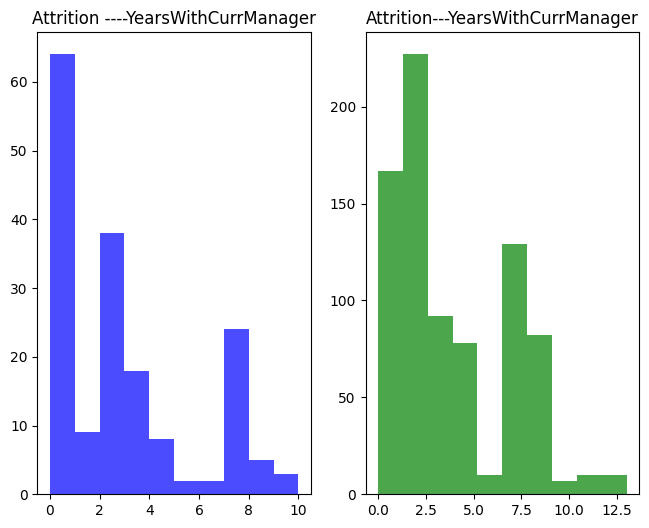

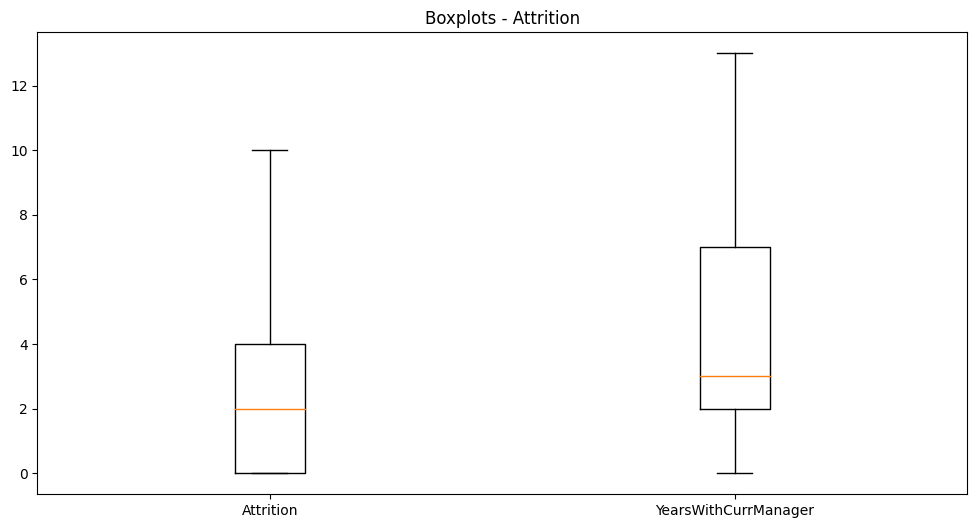


P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes: ShapiroResult(statistic=0.6566915512084961, pvalue=1.6263126679077244e-18)
P-valeur de la normalité (Shapiro-Wilk) - Attrition_no: ShapiroResult(statistic=0.724745512008667, pvalue=1.6471565229318119e-34)


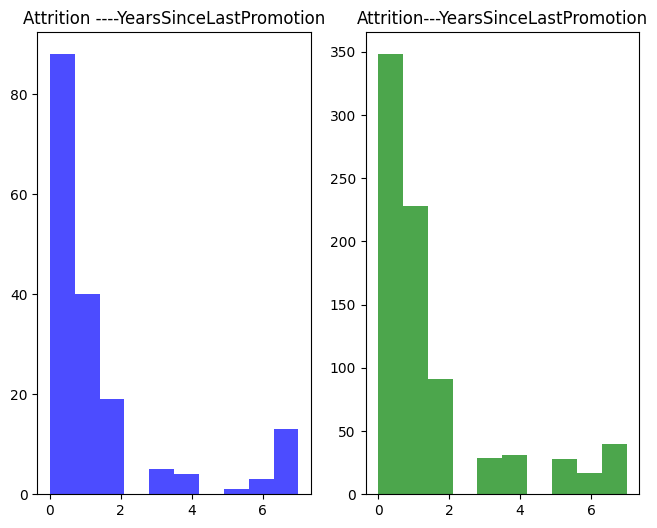

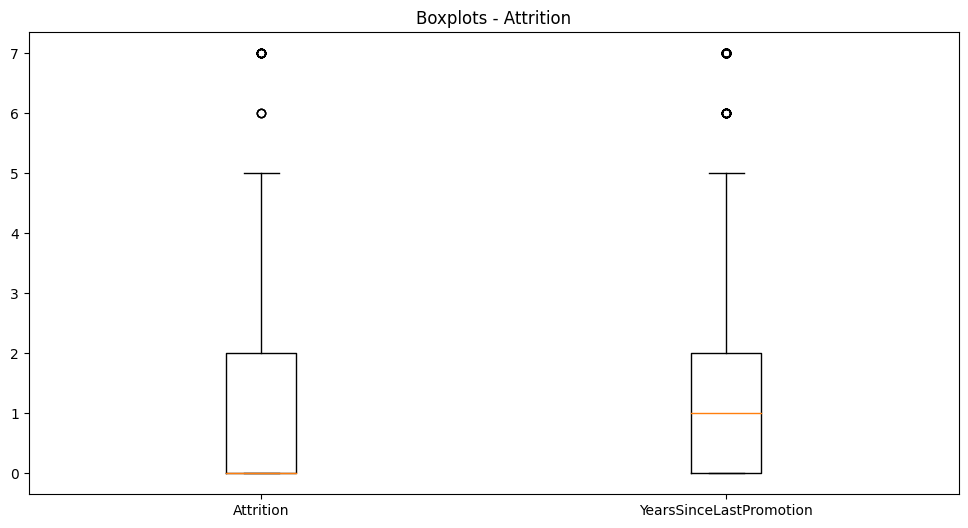


P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes: ShapiroResult(statistic=0.8250582814216614, pvalue=3.95981614468785e-13)
P-valeur de la normalité (Shapiro-Wilk) - Attrition_no: ShapiroResult(statistic=0.9011270403862, pvalue=1.8060388561231374e-22)


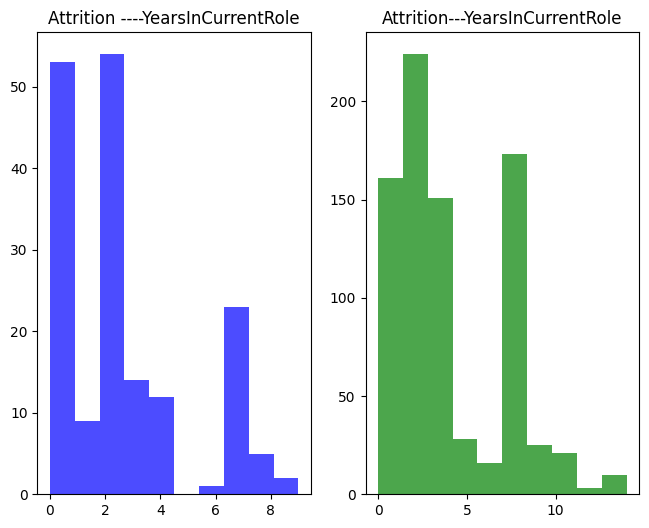

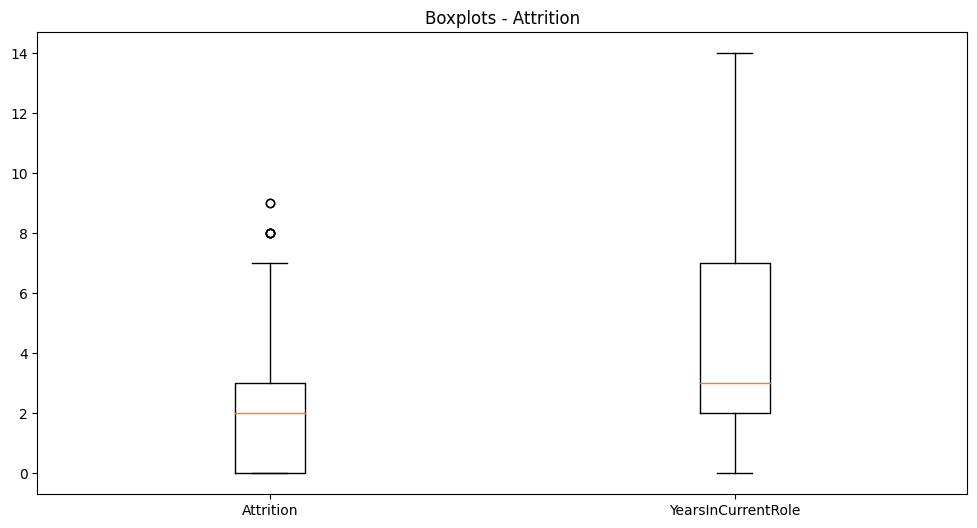


P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes: ShapiroResult(statistic=0.8949120044708252, pvalue=9.954949087287446e-10)
P-valeur de la normalité (Shapiro-Wilk) - Attrition_no: ShapiroResult(statistic=0.9486618041992188, pvalue=3.4451053426318937e-16)


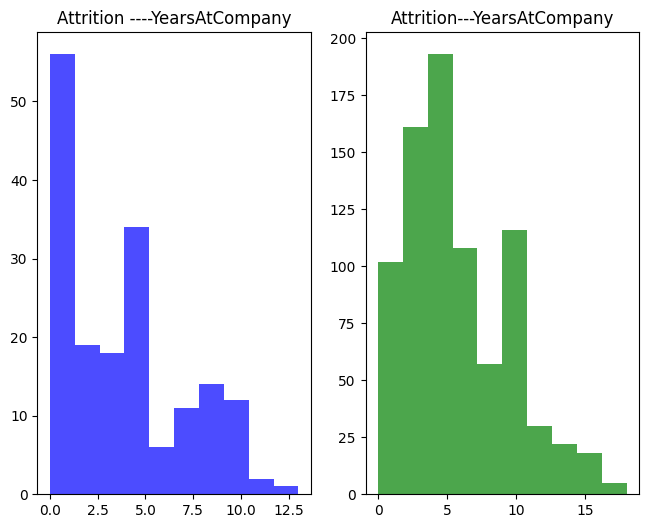

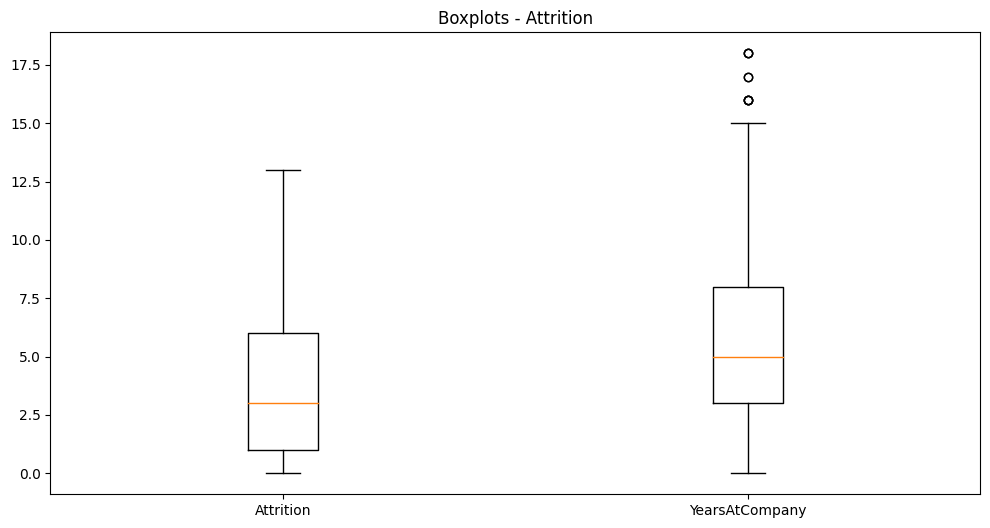


P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes: ShapiroResult(statistic=0.9548845887184143, pvalue=2.3776527086738497e-05)
P-valeur de la normalité (Shapiro-Wilk) - Attrition_no: ShapiroResult(statistic=0.9515599608421326, pvalue=1.0976384443695626e-15)


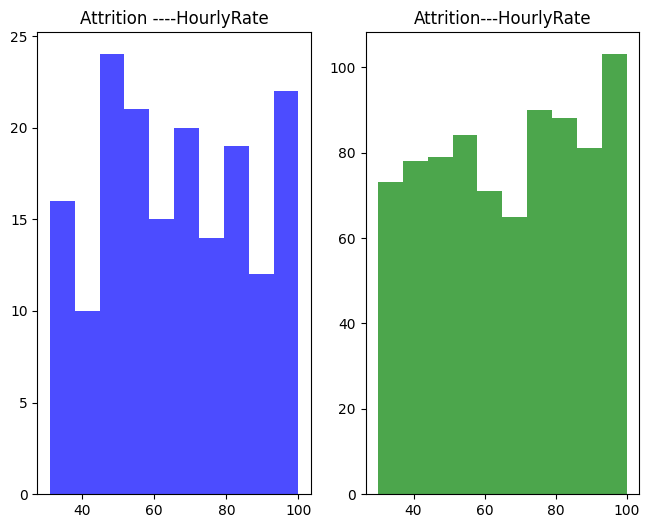

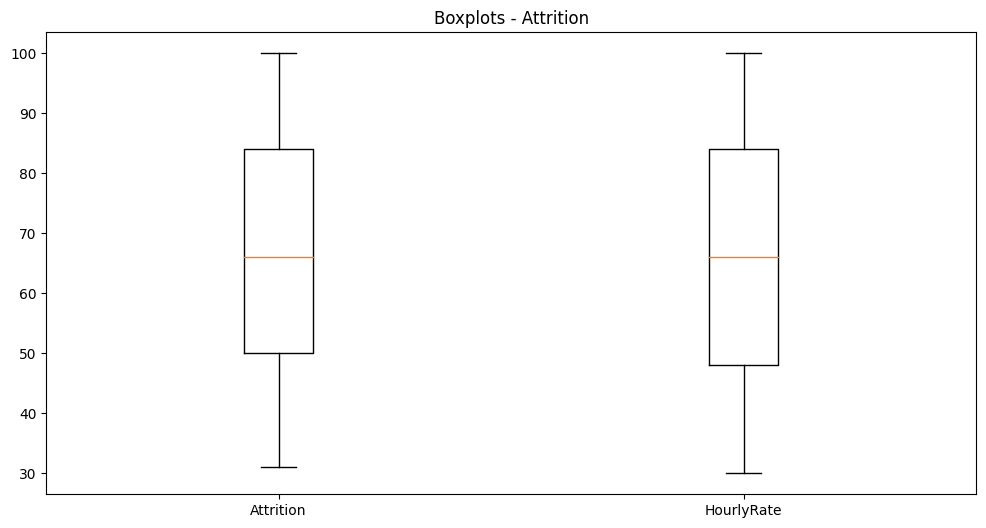


P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes: ShapiroResult(statistic=0.826389729976654, pvalue=4.496843706864456e-13)
P-valeur de la normalité (Shapiro-Wilk) - Attrition_no: ShapiroResult(statistic=0.8441436886787415, pvalue=1.7422177981080707e-27)


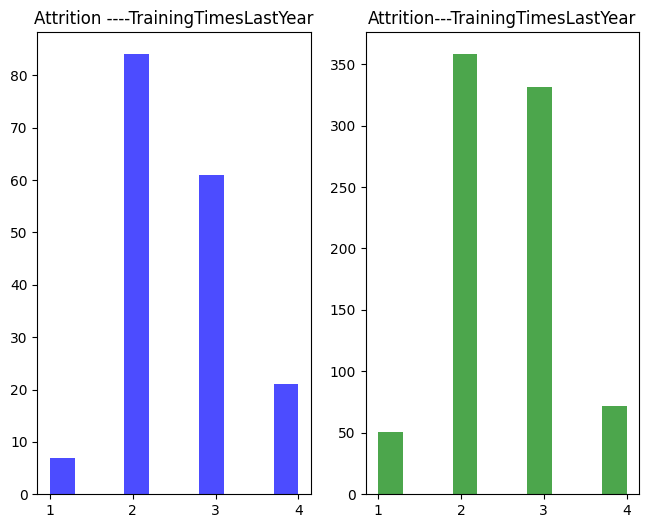

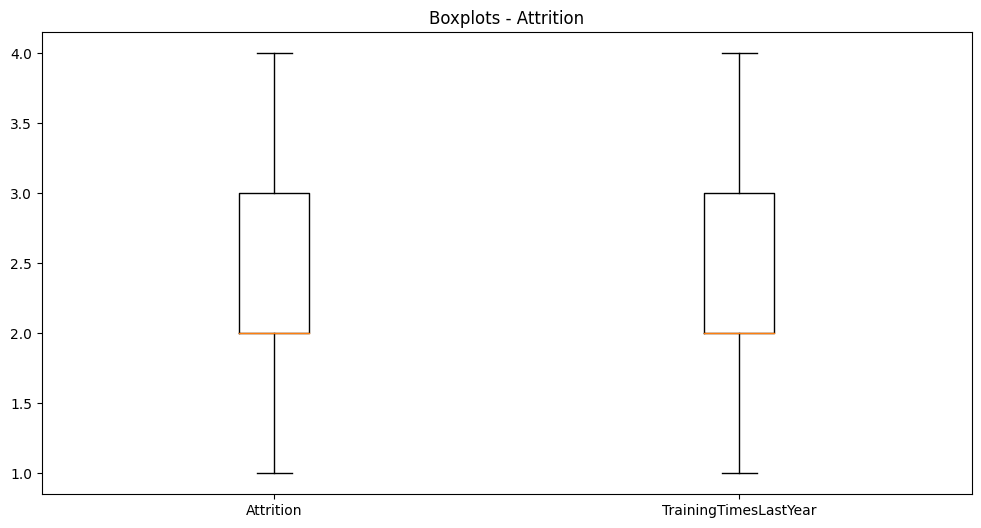


P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes: ShapiroResult(statistic=0.9238942861557007, pvalue=7.140950941675328e-08)
P-valeur de la normalité (Shapiro-Wilk) - Attrition_no: ShapiroResult(statistic=0.9527366161346436, pvalue=1.7815944676295974e-15)


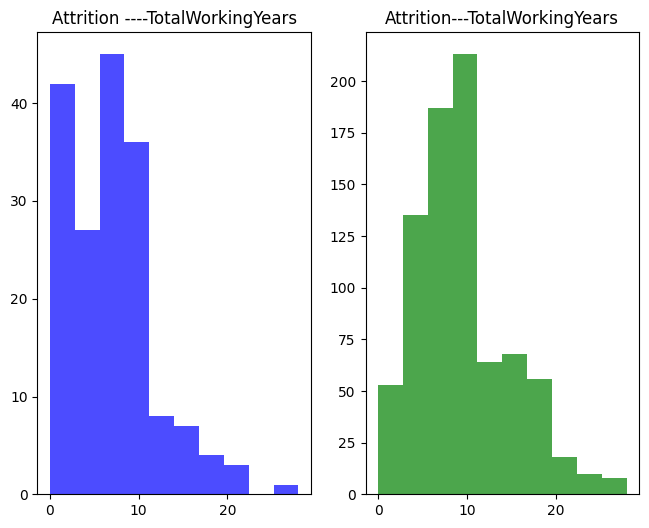

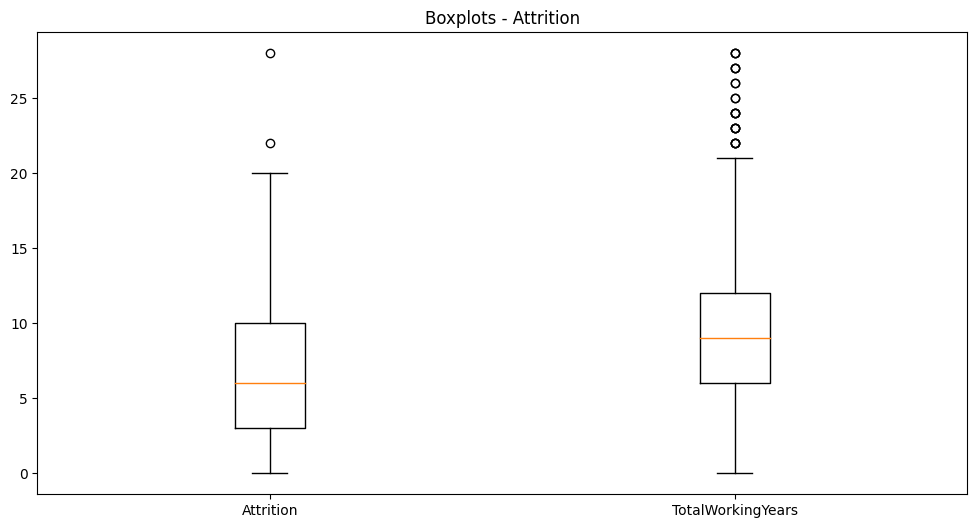


P-valeur de la normalité (Shapiro-Wilk) - Attrition_yes: ShapiroResult(statistic=0.8410563468933105, pvalue=1.9124285488558712e-12)
P-valeur de la normalité (Shapiro-Wilk) - Attrition_no: ShapiroResult(statistic=0.8816213011741638, pvalue=2.1706925784633275e-24)


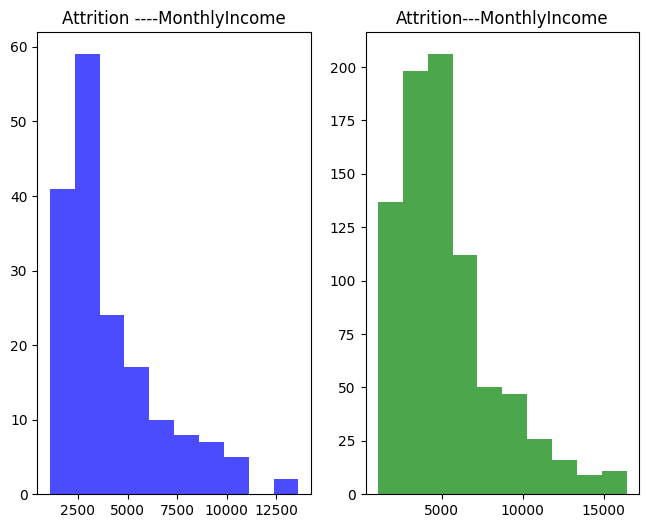

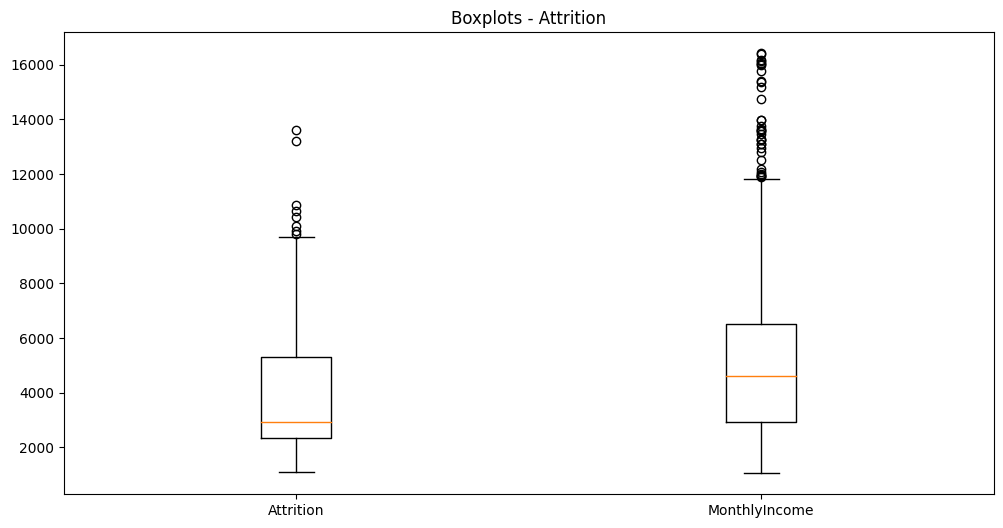

In [81]:
for Var in features_quanti:
    TestStudent(dataClean,'Attrition',Var)
    print("\n===================================")

#### Vu que les p_vlues sont tres tres inferieures a 0.05, on conclut alors que la moyennes des indivi ayant quitté 'entreprise est tres differente de celle des individu qui sont tjrs dans l'entreprise

In [89]:
data= dataClean.copy() #Pour appliquer les changemment a notre jeux de donnees

In [90]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       985 non-null    int64 
 1   Attrition                 985 non-null    object
 2   BusinessTravel            985 non-null    object
 3   DailyRate                 985 non-null    int64 
 4   Department                985 non-null    object
 5   DistanceFromHome          985 non-null    int64 
 6   Education                 985 non-null    int64 
 7   EducationField            985 non-null    object
 8   EmployeeCount             985 non-null    int64 
 9   EmployeeNumber            985 non-null    int64 
 10  EnvironmentSatisfaction   985 non-null    int64 
 11  Gender                    985 non-null    object
 12  HourlyRate                985 non-null    int64 
 13  JobInvolvement            985 non-null    int64 
 14  JobLevel                  985 

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       985 non-null    int64 
 1   Attrition                 985 non-null    object
 2   BusinessTravel            985 non-null    object
 3   DailyRate                 985 non-null    int64 
 4   Department                985 non-null    object
 5   DistanceFromHome          985 non-null    int64 
 6   Education                 985 non-null    int64 
 7   EducationField            985 non-null    object
 8   EmployeeCount             985 non-null    int64 
 9   EmployeeNumber            985 non-null    int64 
 10  EnvironmentSatisfaction   985 non-null    int64 
 11  Gender                    985 non-null    object
 12  HourlyRate                985 non-null    int64 
 13  JobInvolvement            985 non-null    int64 
 14  JobLevel                  985 